In [1]:
import matplotlib.pyplot as plt
import itertools
import random
import copy
%load_ext autoreload
%autoreload 2

In [2]:
# when we're importing modules, they are normally only reloaded when we import.
# here we're going to be making changes to the modules.  
# this code tells python to reload them each time I execute a new line of code
%load_ext autoreload
%autoreload 2

In [3]:
'''
Create a new Schelling class. 

'''
class Schelling:
    # Schelling(20, 20, 0.3, 0.3, 5, 2)
    def __init__(self, width, height, empty_ratio, similarity_threshold,n_iterations,races=2):
        '''
        '''
        self.width = width
        self.height = height
        self.races=races
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.empty_houses = []
        self.agents={}
        
        
    def populate(self):
        self.all_houses = list(itertools.product(range(self.width),range(self.height)))
        random.shuffle(self.all_houses)
        
        self.n_empty = int(self.empty_ratio*len(self.all_houses))
        self.empty_houses = self.all_houses[:self.n_empty]
        
        self.remaining_houses = self.all_houses[self.n_empty:]
        houses_by_race = [self.remaining_houses[i::self.races] for i in range(self.races)]
        for i in range(self.races):
            # create agent for each race
            self.agents = dict(
                                list(self.agents.items()) + 
                                list(dict(zip(houses_by_race[i],[i+1]*len(houses_by_race[i]))).items())
                              )

    def is_unsatisfied(self,x,y):
        race = self.agents[(x,y)]
        count_similar=0
        count_difference =0
        if x>0 and y>0 and (x-1,y-1) not in self.empty_houses:
            if self.agents[(x-1,y-1)]==race:
                count_similar+=1
            else:
                count_difference+=1

        if y>0 and (x,y-1) not in self.empty_houses:
            if self.agents[(x,y-1)]==race:
                count_similar+=1
            else:
                count_difference+=1

        if x<(self.width-1) and y>0 and (x+1,y-1) not in self.empty_houses:
            if self.agents[(x+1,y-1)]==race:
                count_similar+=1
            else:
                count_difference+=1

        if x>0 and (x-1,y) not in self.empty_houses:
            if self.agents[(x-1,y)]==race:
                count_similar+=1
            else:
                count_difference+=1

        if x<(self.width-1) and (x+1,y) not in self.empty_houses:
            if self.agents[(x+1,y)]==race:
                count_similar+=1
            else:
                count_difference+=1


        # now with self.height
        if x>0 and y<(self.height-1) and (x,y+1) not in self.empty_houses:
            if self.agents[(x,y+1)]==race:
                count_similar+=1
            else:
                count_difference+=1
                
        if x<(self.width-1) and y<(self.height-1) and (x+1,y+1) not in self.empty_houses:
            if self.agents[(x+1,y+1)]==race:
                count_similar+=1
            else:
                count_difference+=1

        if (count_similar + count_difference)==0:
            return False
        else:
            return float(count_similar/(count_similar + count_difference))<self.similarity_threshold



    def update(self):
        for i in range(self.n_iterations):
            self.old_agents = copy.deepcopy(self.agents)
            n_change=0
            for agent in self.old_agents:
                if self.is_unsatisfied(agent[0],agent[1]):
                    agent_race=self.agents[agent]
                    empty_house = random.choice(self.empty_houses)
                    self.agents[empty_house]=agent_race
                    del self.agents[agent]
                    self.empty_houses.remove(empty_house)
                    self.empty_houses.append(agent)
                    n_change+=1
            print(n_change)
            if n_change==0:
                break


    def move_to_empty(self,x,y):
        race=self.agents[(x,y)]
        empty_house = randome.choice(self.empty_houses)
        self.updated_agents[empty_house]=race
        del self.updated_agents[(x,y)]
        self.empty_houses.remove(empty_house)
        self.empty_houses.append((x,y))


    def plot(self, title, file_name):
        fig, ax = plt.subplots()
        #If you want to run the simulation with more than 7 colors, you should set agent_colors accordingly
        agent_colors = {1:'b', 2:'r', 3:'g', 4:'c', 5:'m', 6:'y', 7:'k'}
        for agent in self.agents:
            ax.scatter(agent[0]+0.5, agent[1]+0.5, color=agent_colors[self.agents[agent]])

        ax.set_title(title, fontsize=10, fontweight='bold')
        ax.set_xlim([0, self.width])
        ax.set_ylim([0, self.height])
        ax.set_xticks([])
        ax.set_yticks([])
        plt.savefig(file_name)
        
    
    def calculate_similarity(self):
        similarity=[]
        for agent in self.agents:
            count_similar = 0
            count_difference = 0
            x=agent[0]
            y=agent[1]
            race = self.agents[(x,y)]
            if x>0 and y>0 and (x-1,y-1) not in self.empty_houses:
                if self.agents[(x-1,y-1)]==race:
                    count_similar+=1
                else:
                    count_difference+=1
            
            if y>0 and (x,y-1) not in self.empty_houses:
                if self.agents[(x,y-1)]==race:
                    count_similar+=1
                else:
                    count_difference+=1
            
            if x<(self.width-1) and y>0 and (x+1,y-1) not in self.empty_houses:
                if self.agents[(x+1,y-1)] == race:
                    count_similar+=1
                else:
                    count_difference+=1
                    
            if x>0 and (x-1,y) not in self.empty_houses:
                if self.agents[(x-1,y)]==race:
                    count_similar+=1
                else:
                    count_difference+=1
                    
            if x<(self.width-1) and (x+1,y) not in self.empty_houses:
                if self.agents[(x+1,y)]==race:
                    count_similar+=1
                else:
                    count_difference+=1
                    
            if x>0 and y< (self.height-1) and (x-1,y+1) not in self.empty_houses:
                if self.agents[(x-1,y+1)]==race:
                    count_similar+=1
                else:
                    count_difference+=1
            
            if x>0 and y<(self.height-1) and (x,y+1) not in self.empty_houses:
                if self.agents[(x,y+1)]==race:
                    count_similar+=1
                else:
                    count_difference+=1
                    
            if x<(self.width-1) and y<(self.height-1) and (x+1,y+1) not in self.empty_houses:
                if self.agents[(x+1,y+1)]==race:
                    count_similar+=1
                else:
                    count_difference+=1

            try:
                similarity.append(float(count_similar)/(count_similar+count_difference))
            except:
                similarity.append(1)
                
        return sum(similarity)/len(similarity)                    

In [4]:
schelling_1 = Schelling(20, 20, 0.3, 0.3, 5, 2)
schelling_1.populate()

56
24
11
5
1


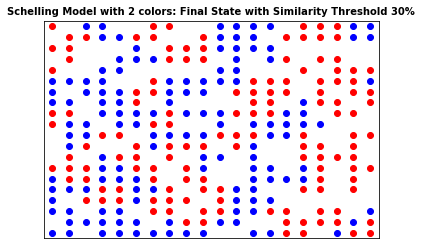

In [5]:
schelling_1.update()
schelling_1.plot('Schelling Model with 2 colors: Final State with Similarity Threshold 30%', 'schelling_2_30_final.png')

In [9]:
similarity_threshold_ratio = {}
for i in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
    schelling = Schelling(20,20,0.3,i,5,2)
    schelling.populate()
    schelling.update()
    similarity_threshold_ratio[i] = schelling.calculate_similarity()

0
22
4
0
23
9
4
2
0
46
26
14
8
9
78
40
21
9
7
102
58
34
20
14
157
87
58
30
21
211
151
123
105
94


In [10]:
print(similarity_threshold_ratio)

{0: 0.4885289115646259, 0.1: 0.5978231292517008, 0.2: 0.6201190476190473, 0.3: 0.727329931972789, 0.4: 0.7758503401360547, 0.5: 0.8161862244897963, 0.6: 0.8890136054421771, 0.7: 0.7939880952380953}


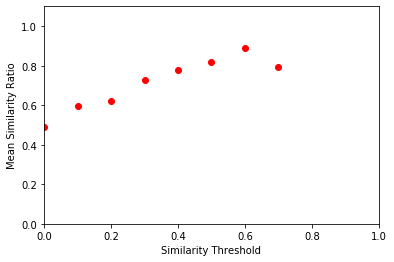

In [12]:
fig, ax = plt.subplots()
# plt.plot(similarity_threshold_ratio.keys(), similarity_threshold_ratio.values(),'ro')
plt.plot(*zip(*sorted(similarity_threshold_ratio.items())),'ro')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.1])
ax.set_xlabel("Similarity Threshold")
ax.set_ylabel("Mean Similarity Ratio")
plt.savefig('schelling_segregation_measure.png')